In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_blobs


2024-05-09 21:11:41.275037: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


The shape of X is: (2000, 2)
The shape of Y is: (2000, 1)


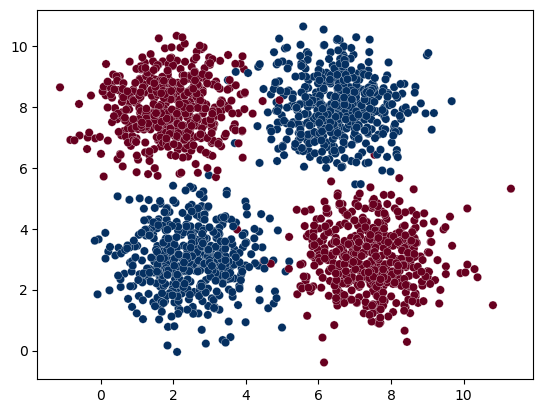

In [2]:
m = 2000
X, y = make_blobs(m, centers=([2.5, 3], [6.5, 8], [2, 8], [7.5, 3]), random_state=0)
y[(y == 0) | (y == 1)] = 1
y[(y == 2) | (y == 3)] = 0

y = np.reshape(y, (-1, 1))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='white', linewidths=0.2);

print ('The shape of X is: ' + str(X.shape))
print ('The shape of Y is: ' + str(y.shape))

In [3]:
def initialize_parameters(n_x, n_h, n_y):
    
    W1 = tf.Variable(tf.random.normal((n_x, n_h)), name='W1')
    b1 = tf.Variable(tf.random.normal((1, n_h)), name='b1')
    W2 = tf.Variable(tf.random.normal((n_h, n_y)), name='W2')
    b2 = tf.Variable(tf.random.normal((1, n_y)), name='b2')

    params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return params

In [4]:
def sigmoid(z):
    return 1/(1+tf.exp(-z))

In [5]:
def forward_propagation(X, params):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']
    
    Z1 = X @ W1 + b1
    A1 = sigmoid(Z1)
    Z2 = A1 @ W2 + b2
    y_hat = sigmoid(Z2)
    return y_hat 

In [6]:
def compute_cost(y, y_hat):
    logloss = tf.keras.losses.binary_crossentropy(y, y_hat)
    return tf.reduce_mean(logloss)

In [7]:
def gradiant_descent(params, grads, learning_rate):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    dW1 = grads['W1']
    db1 = grads['b1']
    dW2 = grads['W2']
    db2 = grads['b2']

    W1.assign_sub(learning_rate * dW1)
    b1.assign_sub(learning_rate * db1)
    W2.assign_sub(learning_rate * dW2)
    b2.assign_sub(learning_rate * db2)

    params = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return params


In [8]:
def nn_model(X, y, n_x, n_h, n_y, epochs, learning_rate):
    params = initialize_parameters(n_x, n_h, n_y)
    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_hat = forward_propagation(X, params)
            cost = compute_cost(y, y_hat)
            
            if epoch % 100 == 0:
                print(f'Epoch:{epoch}, Cost: {cost}')
        
        # Backward Propagation
        grads = tape.gradient(cost, params)
        
        params = gradiant_descent(params, grads, learning_rate)

    return params

In [15]:
LEARNING_RATE = 1.5
EPOCHS = 1500

n_x = X.shape[1]    # number of inputs
n_h = 2             # number of perceptrons in hidden layer
n_y = 1             # number of perceptrons in output layer

params = nn_model(X, y, n_x, n_h, n_y, EPOCHS, LEARNING_RATE)

Epoch:0, Cost: 1.2229104042053223
Epoch:100, Cost: 0.24685785174369812
Epoch:200, Cost: 0.18527400493621826
Epoch:300, Cost: 0.16074280440807343
Epoch:400, Cost: 0.1469937413930893
Epoch:500, Cost: 0.1398160755634308
Epoch:600, Cost: 0.13876233994960785
Epoch:700, Cost: 0.14873982965946198
Epoch:800, Cost: 0.13262560963630676
Epoch:900, Cost: 0.13361525535583496
Epoch:1000, Cost: 0.13862678408622742
Epoch:1100, Cost: 0.39883431792259216
Epoch:1200, Cost: 0.13316217064857483
Epoch:1300, Cost: 0.13630938529968262
Epoch:1400, Cost: 0.13156044483184814


In [16]:
def predict(X, params):
    A2 = forward_propagation(X, params)
    predictions = A2 > 0.5
    
    return predictions.numpy()

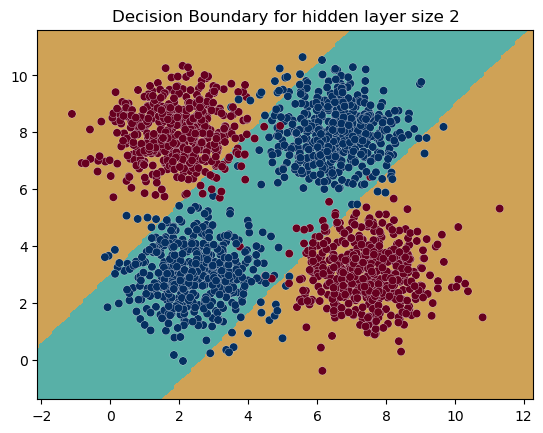

In [17]:
def plot_decision_boundary(X, y, params):
    
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    xx, yy = np.meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    grid = np.hstack((r1,r2))

    predictions = predict(grid, params)

    zz = predictions.reshape(xx.shape)

    plt.contourf(xx, yy, zz, cmap='BrBG')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='white', linewidths=0.2)


plot_decision_boundary(X, y, params);
plt.title("Decision Boundary for hidden layer size " + str(n_h));